<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [5]:
!pip install pandas

### Step 1: Import Required Libraries


In [6]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [7]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())



   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [9]:
#Task 1 Count the number of duplicate rows in the dataset
print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 0 duplicate rows.


In [11]:
#Task 2 Display the first few duplicate rows to understand their structure
first_few_duplicates = df[df.duplicated()].head(20)
print("First few duplicate rows:")
print(first_few_duplicates)

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWork

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [ ]:
## Write your code here

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [13]:
#Task 1 Identify missing values for all columns in the dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


In [15]:
#Find out how many rows are missing in the column 'EdLevel'
print("There are", df['EdLevel'].isnull().sum(), "missing values in the column 'EdLevel'")

There are 4653 missing values in the column 'EdLevel'


In [16]:
#Count missing data
#Boolean value, "True" means missing data, "False" means isn't missing data
missing_data = df.isnull()
missing_data.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
5,False,False,False,False,True,False,True,False,False,True,...,True,True,True,True,True,True,False,False,True,True
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
7,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True


In [17]:
#count missing value in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ResponseId
ResponseId
False    65437
Name: count, dtype: int64

MainBranch
MainBranch
False    65437
Name: count, dtype: int64

Age
Age
False    65437
Name: count, dtype: int64

Employment
Employment
False    65437
Name: count, dtype: int64

RemoteWork
RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
Check
False    65437
Name: count, dtype: int64

CodingActivities
CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
DevType
False    59445
True      5992
Name: count, dty

In [29]:
#Task 2 Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value
print('There are', df['EdLevel'].nunique(), 'unique Education Level in the survey:')
print('\nEducation Level                                                                    value count')
print(df['EdLevel'].value_counts())

print('\nThere are', df['RemoteWork'].nunique(), 'unique Remote Work values in the survey:')
print('\nRemote Work                          value count')
print(df['RemoteWork'].value_counts())

There are 8 unique Education Level in the survey:

Education Level                                                                    value count
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

There are 3 unique Remote Work values in the survey:

Remote Work                  

In [31]:
#majority value for "EdLevel" column is "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" (24942)
df['EdLevel'].value_counts().idxmax()

'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'

In [34]:
#replace the missing 'EdLevel' values by the most frequent
import numpy as np
df['EdLevel'].replace(np.nan, "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", inplace=True)

/tmp/ipykernel_319/80099849.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].replace(np.nan, "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", inplace=True)


In [35]:
#check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in EdLevel column:\n')
print( missing_data['EdLevel'].value_counts())


Value counts for missing data in EdLevel column:

EdLevel
False    65437
Name: count, dtype: int64


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [36]:
print(df['ConvertedCompYearly'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: ConvertedCompYearly, Length: 65437, dtype: float64


In [43]:
#check missing data for ConvertedCompYearly
missing_data = df.isnull()
print('\nValue counts for missing data in ConvertedCompYearly column:\n')
print( missing_data['ConvertedCompYearly'].value_counts())

print('\nValue counts for missing data in Currency column:\n')
print( missing_data['Currency'].value_counts())

print('\nValue counts for missing data in CompTotal column:\n')
print( missing_data['CompTotal'].value_counts())


Value counts for missing data in ConvertedCompYearly column:

ConvertedCompYearly
True     42002
False    23435
Name: count, dtype: int64

Value counts for missing data in Courrency column:

Currency
False    46684
True     18753
Name: count, dtype: int64

Value counts for missing data in CompTotal column:

CompTotal
False    33740
True     31697
Name: count, dtype: int64


In [46]:
print('\nThere are', df['Currency'].nunique(), 'unique Currency values in the survey:')
print(df['Currency'].value_counts())

print('\nThere are', df['CompTotal'].nunique(), 'unique Compensation Total values in the survey:')
print(df['CompTotal'].value_counts())

print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique Converted Compensation Yearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())


There are 142 unique Currency values in the survey:
Currency
EUR European Euro            12730
USD\tUnited States dollar    10939
INR\tIndian rupee             2905
GBP\tPound sterling           2614
CAD\tCanadian dollar          1639
                             ...  
SZL\tSwazi lilangeni             1
none\tCook Islands dollar        1
AWG\tAruban florin               1
BBD\tBarbadian dollar            1
BMD\tBermudian dollar            1
Name: count, Length: 142, dtype: int64

There are 3337 unique CCompensation Total values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64

There are 6113 unique Converted Compensation Yearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1


In [50]:
#calculate the mean value for the "ConvertedCompYearly" column
avg_convcompyearly = df["ConvertedCompYearly"].astype("float").mean(axis=0)
print("Average of ConvertedCompYearly:", avg_convcompyearly)

#replace the missing 'ConvertedCompYearly' values by the mean value
df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)

Average of ConvertedCompYearly: 86155.28726264134


/tmp/ipykernel_319/1226031951.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


In [51]:
#check after replacement
missing_data = df.isnull()
print('\nValue counts for missing data in ConvertedCompYearly column:\n')
print( missing_data['ConvertedCompYearly'].value_counts())


Value counts for missing data in ConvertedCompYearly column:

ConvertedCompYearly
False    65437
Name: count, dtype: int64


In [57]:
#make new column 'NormalizeConvCompYearly' dataframe
df['NormalizeConvCompYearly']=df['ConvertedCompYearly']/df['ConvertedCompYearly'].max()
df['NormalizeConvCompYearly'].head(10)

0    0.0053
1    0.0053
2    0.0053
3    0.0053
4    0.0053
5    0.0053
6    0.0053
7    0.0053
8    0.0053
9    0.0053
Name: NormalizeConvCompYearly, dtype: float64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 141.4 MB/s eta 0:00:00
[6.15134663e-08 3.33333374e-01 6.66666687e-01 1.00000000e+00]


Text(0.5, 1.0, 'Normalize Converted Compensation Yearly Bins')

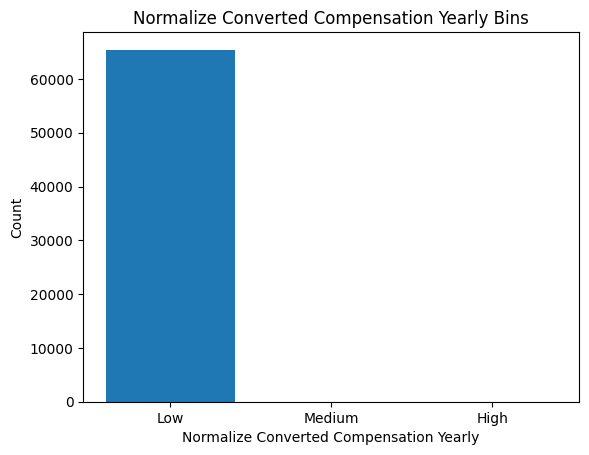

In [69]:
!pip install matplotlib
import matplotlib.pylab as plt

#set bin
bins = np.linspace(min(df['NormalizeConvCompYearly']), max(df['NormalizeConvCompYearly']), 4)
print(bins)

#set group name
group_names = ['Low', 'Medium', 'High']

#apply the function "cut" to determine what each value of df['NormalizeConvCompYearly'] belongs to
df['NormalizeConvCompYearly-binned'] = pd.cut(df['NormalizeConvCompYearly'], bins, labels=group_names, include_lowest=True )

#see the number of each bin
df["NormalizeConvCompYearly-binned"].value_counts()

#plot the distribution of each bin
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["NormalizeConvCompYearly-binned"].value_counts())

plt.pyplot.xlabel("Normalize Converted Compensation Yearly")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Normalize Converted Compensation Yearly Bins")

In [70]:
df[['NormalizeConvCompYearly','NormalizeConvCompYearly-binned']].head(20)

,NormalizeConvCompYearly,NormalizeConvCompYearly-binned
0,0.0053,Low
1,0.0053,Low
2,0.0053,Low
3,0.0053,Low
4,0.0053,Low
5,0.0053,Low
6,0.0053,Low
7,0.0053,Low
8,0.0053,Low
9,0.0053,Low


In [73]:
print('\nThere are', df['NormalizeConvCompYearly-binned'].nunique(), 'unique NormalizeConvCompYearly-binned values in the survey:')
print(df['NormalizeConvCompYearly-binned'].value_counts())


There are 3 unique NormalizeConvCompYearly-binned values in the survey:
NormalizeConvCompYearly-binned
Low       65433
Medium        2
High          2
Name: count, dtype: int64


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
